<a href="https://colab.research.google.com/github/Elians001/Modelo_Predictivo-Rayosx/blob/main/MODELO_PREDICTIVO_RAYOSX_Elias_Salazar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import requests

# URL al archivo Excel en GitHub
url = "https://github.com/Elians001/proyecto_modelo/raw/main/Dataset_Clinico_Clasificado_FINAL.xlsx"

# Descargar el archivo
response = requests.get(url)
with open("Dataset.xlsx", "wb") as f:
    f.write(response.content)

# Leer el archivo descargado
df = pd.read_excel("Dataset.xlsx")
df.head()


,Codigo,Nombre de la prestación médica,Especialidad,Clase (rayos X),Comentario clínico
0,333071,ARTRODESIS DE MANO O PIE C/U 2104009,ARTRODESIS CUALQ. TECNICA,2,NaN
1,334075,BIOPSIA ÓSEA POR PUNCIÓN 2104033,BP.SINOV-OSEA-MUSCULAR,0,NaN
2,301104,AUTOINJERTO PARATIROIDES (1 LADO) 1402007,CABEZA Y CUELLO,0,NaN
3,301110,BIOPSIA QX. PIEL Y MUCOSA CARA 1402027,CABEZA Y CUELLO,0,NaN
4,301003,"CA. PISO BOCA, RESECCION 1402048",CABEZA Y CUELLO,0,NaN


In [11]:
from sklearn.preprocessing import LabelEncoder

modelo_df = df[["Nombre de la prestación médica", "Especialidad", "Clase (rayos X)"]].copy()
le_nombre = LabelEncoder()
modelo_df["Nombre_encoded"] = le_nombre.fit_transform(modelo_df["Nombre de la prestación médica"])
modelo_df = pd.concat([modelo_df, pd.get_dummies(modelo_df["Especialidad"], prefix="Esp")], axis=1)
modelo_df.drop(columns=["Nombre de la prestación médica", "Especialidad"], inplace=True)


In [12]:
from sklearn.model_selection import train_test_split

X = modelo_df.drop(columns=["Clase (rayos X)"])
y = modelo_df["Clase (rayos X)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [13]:
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

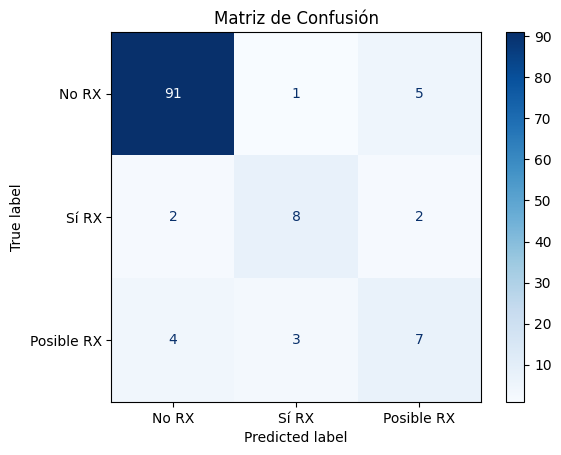

              precision    recall  f1-score   support

       No RX       0.94      0.94      0.94        97
       Sí RX       0.67      0.67      0.67        12
  Posible RX       0.50      0.50      0.50        14

    accuracy                           0.86       123
   macro avg       0.70      0.70      0.70       123
weighted avg       0.86      0.86      0.86       123



In [14]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

y_pred = modelo.predict(X_test)
ConfusionMatrixDisplay.from_estimator(modelo, X_test, y_test, display_labels=["No RX", "Sí RX", "Posible RX"], cmap="Blues")
plt.title("Matriz de Confusión")
plt.show()

print(classification_report(y_test, y_pred, target_names=["No RX", "Sí RX", "Posible RX"]))


<ipython-input-15-1455899365>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis")


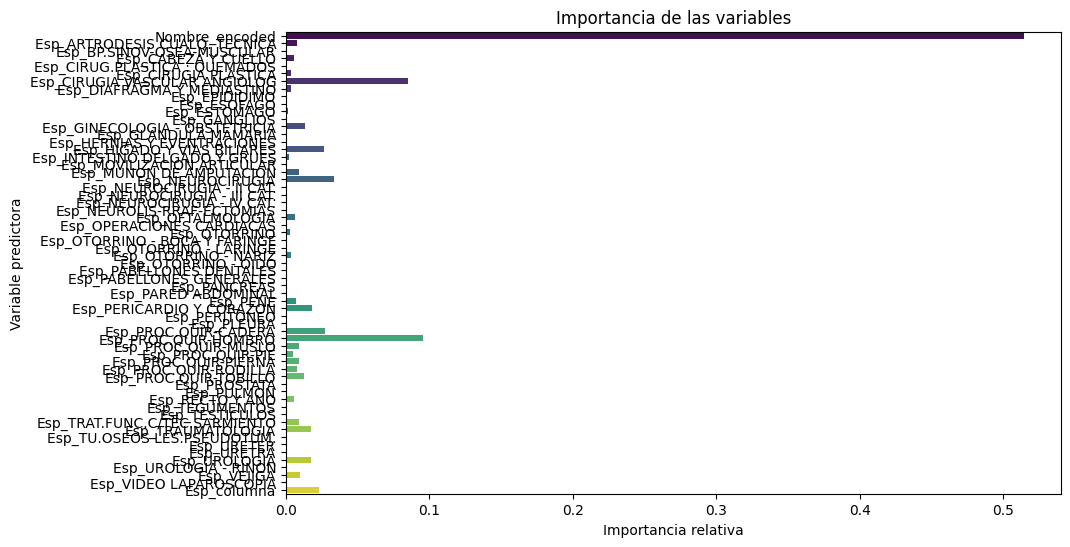

In [15]:
importances = modelo.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Importancia de las variables")
plt.xlabel("Importancia relativa")
plt.ylabel("Variable predictora")
plt.show()


<ipython-input-16-2277728170>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, x="Importancia", y="Variable", palette="viridis")


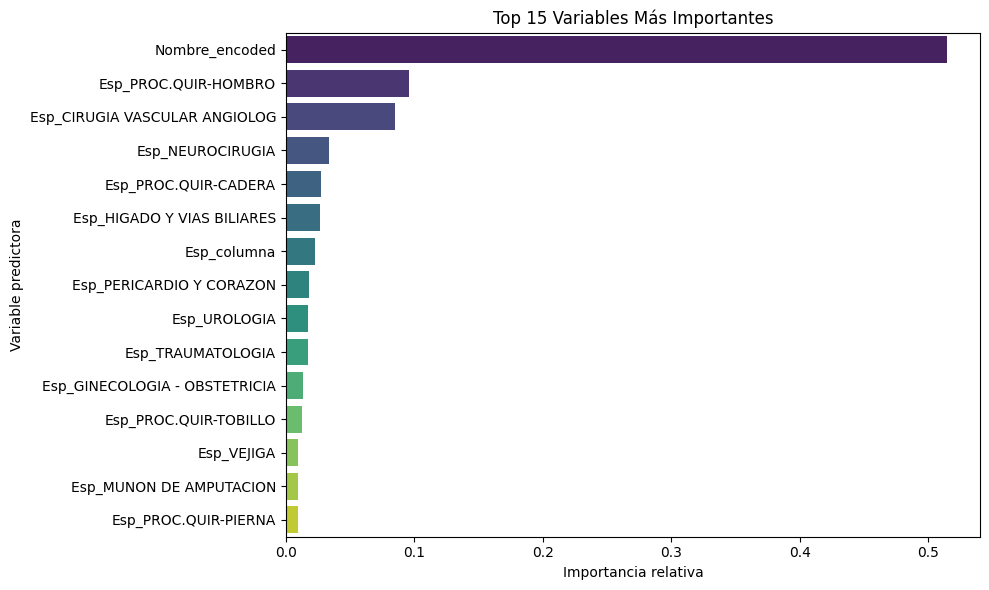

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que ya tienes el modelo entrenado y X definido
importances = modelo.feature_importances_
features = X.columns

# Crear DataFrame de importancia
importancia_df = pd.DataFrame({
    'Variable': features,
    'Importancia': importances
})

# Ordenar por importancia descendente y seleccionar top 15
top_features = importancia_df.sort_values(by="Importancia", ascending=False).head(15)

# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(data=top_features, x="Importancia", y="Variable", palette="viridis")
plt.title("Top 15 Variables Más Importantes")
plt.xlabel("Importancia relativa")
plt.ylabel("Variable predictora")
plt.tight_layout()
plt.savefig("importancia_variables_rayosx.png", dpi=300)
plt.show()


<ipython-input-17-2183353096>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Clase (rayos X)", palette="pastel")


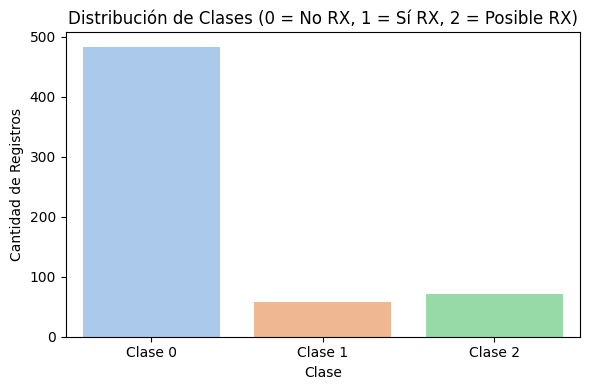

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset (ajusta la ruta si tu archivo está en otra ubicación)
ruta = "/content/Dataset_Clinico_Clasificado_FINAL.xlsx"
df = pd.read_excel(ruta)

# Crear gráfico de distribución de clases
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Clase (rayos X)", palette="pastel")
plt.title("Distribución de Clases (0 = No RX, 1 = Sí RX, 2 = Posible RX)")
plt.xlabel("Clase")
plt.ylabel("Cantidad de Registros")
plt.xticks([0, 1, 2], ['Clase 0', 'Clase 1', 'Clase 2'])
plt.tight_layout()

# Guardar imagen
plt.savefig("/content/distribucion_clases.png", dpi=300)
plt.show()


In [18]:
# Calcular distribución en porcentajes y cantidad
distribucion = df["Clase (rayos X)"].value_counts(normalize=False)
porcentajes = df["Clase (rayos X)"].value_counts(normalize=True) * 100

for clase in sorted(distribucion.index):
    print(f"Clase {clase}: {distribucion[clase]} registros — {porcentajes[clase]:.1f}%")


Clase 0: 483 registros — 78.9%
Clase 1: 58 registros — 9.5%
Clase 2: 71 registros — 11.6%


In [19]:
from google.colab import files
files.download("/content/distribucion_clases.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
import pandas as pd
import requests

# URL directa al archivo Excel en tu GitHub (usa raw)
url = "https://github.com/Elians001/proyecto_modelo/raw/main/Dataset_Clinico_Clasificado_FINAL.xlsx"

# Descargar el archivo desde GitHub
response = requests.get(url)
with open("Dataset_Clinico_Clasificado_FINAL.xlsx", "wb") as f:
    f.write(response.content)

# Leer el archivo descargado
df = pd.read_excel("Dataset_Clinico_Clasificado_FINAL.xlsx")
df.head()


,Codigo,Nombre de la prestación médica,Especialidad,Clase (rayos X),Comentario clínico
0,333071,ARTRODESIS DE MANO O PIE C/U 2104009,ARTRODESIS CUALQ. TECNICA,2,NaN
1,334075,BIOPSIA ÓSEA POR PUNCIÓN 2104033,BP.SINOV-OSEA-MUSCULAR,0,NaN
2,301104,AUTOINJERTO PARATIROIDES (1 LADO) 1402007,CABEZA Y CUELLO,0,NaN
3,301110,BIOPSIA QX. PIEL Y MUCOSA CARA 1402027,CABEZA Y CUELLO,0,NaN
4,301003,"CA. PISO BOCA, RESECCION 1402048",CABEZA Y CUELLO,0,NaN


In [21]:
from sklearn.preprocessing import LabelEncoder

# Preprocesamiento mínimo para entrenar el modelo
df_modelo = df[["Nombre de la prestación médica", "Especialidad", "Clase (rayos X)"]].copy()

le = LabelEncoder()
df_modelo["Nombre_encoded"] = le.fit_transform(df_modelo["Nombre de la prestación médica"])
df_modelo = pd.concat([df_modelo, pd.get_dummies(df_modelo["Especialidad"], prefix="Esp")], axis=1)
df_modelo.drop(columns=["Nombre de la prestación médica", "Especialidad"], inplace=True)

X = df_modelo.drop(columns=["Clase (rayos X)"])
y = df_modelo["Clase (rayos X)"]


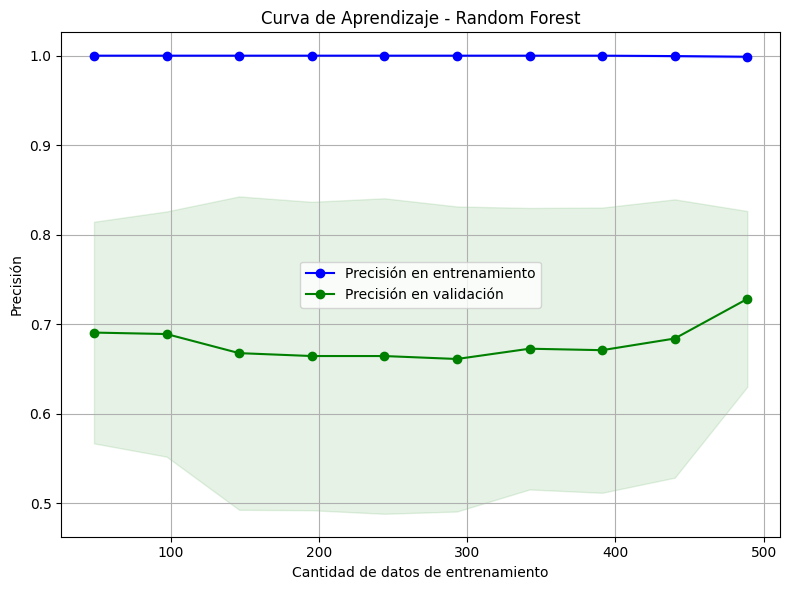

In [8]:
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Definir modelo base
modelo = RandomForestClassifier(n_estimators=100, random_state=42)

# Curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    modelo,
    X,
    y,
    cv=5,
    scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

# Promedios y desviaciones estándar
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Precisión en entrenamiento")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.plot(train_sizes, test_scores_mean, 'o-', color="green", label="Precisión en validación")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="green")

plt.title("Curva de Aprendizaje - Random Forest")
plt.xlabel("Cantidad de datos de entrenamiento")
plt.ylabel("Precisión")
plt.grid(True)
plt.legend(loc="best")
plt.tight_layout()
plt.savefig("curva_aprendizaje_rayosx.png", dpi=300)
plt.show()
